<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/11-K-Means-Clustering/02_Kmeans_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Color Quantization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
image_as_array = mpimg.imread('gdrive/My Drive/csv_files/palm_trees.jpg')

In [4]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape    #(Height, Width, Color Channel)

(1401, 934, 3)

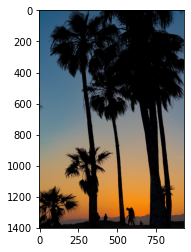

In [6]:
#plt.figure(dpi=200)
plt.imshow(image_as_array)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [7]:
(h,w,c) = image_as_array.shape

In [8]:
h

1401

In [9]:
image_as_array_2d = image_as_array.reshape(h*w,c)

In [10]:
image_as_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [11]:
len(image_as_array.shape)

3

In [12]:
len(image_as_array_2d.shape)

2

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=6)

In [15]:
labels = model.fit_predict(image_as_array_2d)

In [16]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [17]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [18]:
rgb_codes

array([[  3,   3,   4],
       [138, 144, 144],
       [ 72, 110, 138],
       [219, 135,  46],
       [ 68,  62,  62],
       [193, 155, 108]])

In [19]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [20]:
quantized_img = np.reshape(rgb_codes[labels],(h,w,c))

In [21]:
quantized_img

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

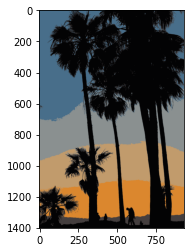

In [22]:
plt.imshow(quantized_img)